* 아래 실습을 위한 파일은 eTL에서 다운받을 수 있습니다.  

  * `covid19_seoul.csv` 서울 열린데이터 광장에서 다운로드 받은 파일로, 서울시 기준의 코로나19 확진자 관련 정보를 확인할 수 있습니다.  

  * `environment1.csv`와 `environment2.csv`는 공공 데이터 포털(data.go.kr)에서 다운로드 받은 파일를 분할한 것으로, 도로 재비산먼지 측정 정보를 확인할 수 있습니다.  
    * 설명) 한국환경공단_도로 재비산먼지 측정 정보는 특수제작한 이동측정차량으로 주행하는 차량의 타이어(휠)와 도로면의 마찰에 의해서 재비산되는 먼지(PM10)를 측정한 월간 평균 자료입니다.  
    * 주의) 데이터의 결측치는 실습을 위해서 임의로 비워둔 값입니다. 


**수업에 필요한 모듈을 임포트하여라.** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

실습에 앞서, `matplotlib` 패키지의 글꼴을 한글 표시가 가능하도록 한글을 지원하는 글꼴로 바꿔준다. 혹시 한글 표시에 오류가 발생한다면 상단 메뉴에서 [런타임]>[런타임 다시 시작] 또는 [다시 시작 및 모두 실행] 을 눌러 런타임을 재시작하면 된다.  

In [ ]:
!apt install -y fonts-nanum
!fc-cache -fv

applyfont = "NanumBarunGothic"

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
  fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,550 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truety

한글이 잘 표시되는지 아래 코드를 실행시켜서 확인해보면 좋다. 한글이 정상적으로 나온다면 잘 적용된 것이다. 

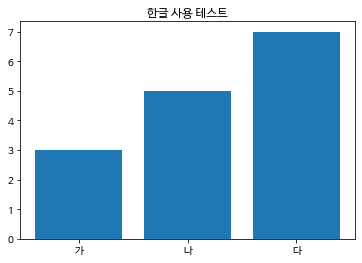

In [ ]:
dat = pd.Series({'가': 3, '나': 5, '다': 7})

plt.bar(dat.index, dat)
plt.title("한글 사용 테스트")
plt.show()

**문제1) 아래의 질문에 답하여라.**

1) `covid19_seoul.csv` 파일을 읽어 데이터프레임 `df_covid`를 만들어라. 

In [ ]:
df_covid = pd.read_csv("covid19_seoul.csv")
df_covid

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,40830,2021-05-14,NaN,NaN,NaN,마포구,NaN,해외유입,NaN,-,NaN,2021-05-15 10:52,2021-05-15 10:52,Y
1,40829,2021-05-14,NaN,NaN,NaN,은평구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021-05-15 10:52,2021-05-15 10:52,Y
2,40828,2021-05-14,NaN,NaN,NaN,은평구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021-05-15 10:52,2021-05-15 10:52,Y
3,40827,2021-05-14,NaN,NaN,NaN,은평구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021-05-15 10:52,2021-05-15 10:52,Y
4,40826,2021-05-14,NaN,NaN,NaN,구로구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021-05-15 10:52,2021-05-15 10:52,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40825,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
40826,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
40827,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
40828,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y


2) `df_covid`의 열(column)에는 어떠한 것이 있는가? 열의 개수는 몇 개인가?

In [ ]:
df_covid.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

In [ ]:
len(df_covid.columns)

14

연번, 확진일 등의 정보를 담은 열(column)이 존재하고, 총 개수는 14개이다.

참고: 사람에게 보기 좋게 정보를 출력해주는 `info()`라는 메소드를 제공하고 있다. 해당 메소드를 이용하면 전체적인 정보를 빠르게 확인할 수 있다. 

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40830 entries, 0 to 40829
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      40830 non-null  int64  
 1   확진일     40830 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      40830 non-null  object 
 6   여행력     1087 non-null   object 
 7   접촉력     40830 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      40802 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     40830 non-null  object 
 12  수정일     40830 non-null  object 
 13  노출여부    40830 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 4.4+ MB


3) `df_covid`에는 몇 개의 관측치가 있는가?

데이터프레임에서 관측치의 개수, 즉, 행의 개수는 `len()`  함수를 통해 구할 수 있다. 

In [ ]:
len(df_covid)

40830

4) 가장 많은 확진자가 나온 날은 언제인가? 그때의 확진자 수는 몇 명인가?

먼저, 각 날짜별 확진자수를 구하기 위하여 `value_counts()` 메소드를 사용한다. 


In [ ]:
covid_per_day = df_covid["확진일"].value_counts()
covid_per_day

2020-12-17    588
2020-12-24    567
2020-12-28    523
2020-12-25    428
2020-12-16    425
             ... 
2020-04-15      1
2020-02-02      1
2020-04-24      1
2020-05-01      1
2020-05-17      1
Name: 확진일, Length: 445, dtype: int64

방법 1: 내림차순 정렬 후 `head()` 메소드를 통해 가장 상위에 나타난 행을 확인

In [ ]:
covid_per_day.sort_values(ascending=False).head()

2020-12-17    588
2020-12-24    567
2020-12-28    523
2020-12-25    428
2020-12-16    425
Name: 확진일, dtype: int64

방법 2: `max()` 메소드를 이용한 후 해당 행을 찾는 방법

In [ ]:
covid_per_day[covid_per_day == covid_per_day.max()]

2020-12-17    588
Name: 확진일, dtype: int64

5) 일별 확진자수를 선 그래프로 시각화하여라. 

시간 순으로 보기 위해서 시리즈의 인덱스인 날짜로 정렬한다. 이를 위해 `sort_index()` 메소드를 이용한다. 

In [ ]:
covid_per_day = covid_per_day.sort_index()
covid_per_day

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-05-10    163
2021-05-11    223
2021-05-12    227
2021-05-13    231
2021-05-14    254
Name: 확진일, Length: 445, dtype: int64

`matplotlib.pyplot` 모듈에서 `plt()` 함수를 이용하면 꺾은선 그래프를 그릴 수 있다. 

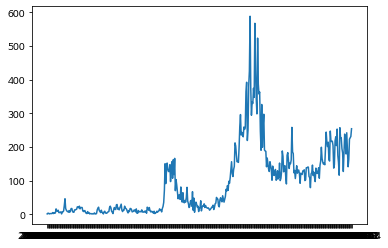

In [ ]:
plt.plot(covid_per_day)
plt.show()

참고: 아래와 같이 여러 정보를 같이 넣어주면 시각적으로 좋다. 

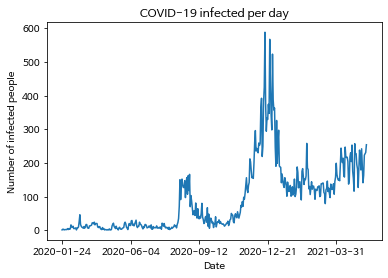

In [ ]:
plt.plot(covid_per_day)

plt.title("COVID-19 infected per day")
plt.xlabel("Date")
plt.ylabel("Number of infected people")
plt.xticks(covid_per_day.index[::100])

plt.show()

6) 지역별 확진자 수를 막대 그래프로 시각화하여라. 단, 관악구는 다른 색으로 표시하여, 잘 보이도록 한다. 

먼저, 지역별 확진자수를 구한다. 

In [ ]:
covid_per_area = df_covid["지역"].value_counts()
covid_per_area

송파구     2314
강남구     2191
강서구     2088
기타      2088
관악구     1933
타시도     1923
노원구     1852
은평구     1833
중랑구     1830
서초구     1729
동작구     1723
성북구     1696
강동구     1549
동대문구    1534
영등포구    1496
양천구     1463
구로구     1383
광진구     1317
도봉구     1305
마포구     1290
강북구     1139
성동구     1118
용산구     1073
서대문구     979
종로구      716
금천구      638
중구       630
Name: 지역, dtype: int64

그 후, `plt.bar()` 메소드를 이용해 막대그래프를 그려준다. 

<BarContainer object of 27 artists>

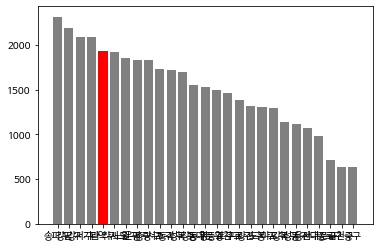

In [ ]:
colors = pd.Series("gray", index=covid_per_area.index)
colors["관악구"] = "red"

plt.bar(covid_per_area.index, covid_per_area, color=colors)

아래와 같이 정보를 더 표시하고 사이즈를 키우면 시각적으로 좋다.

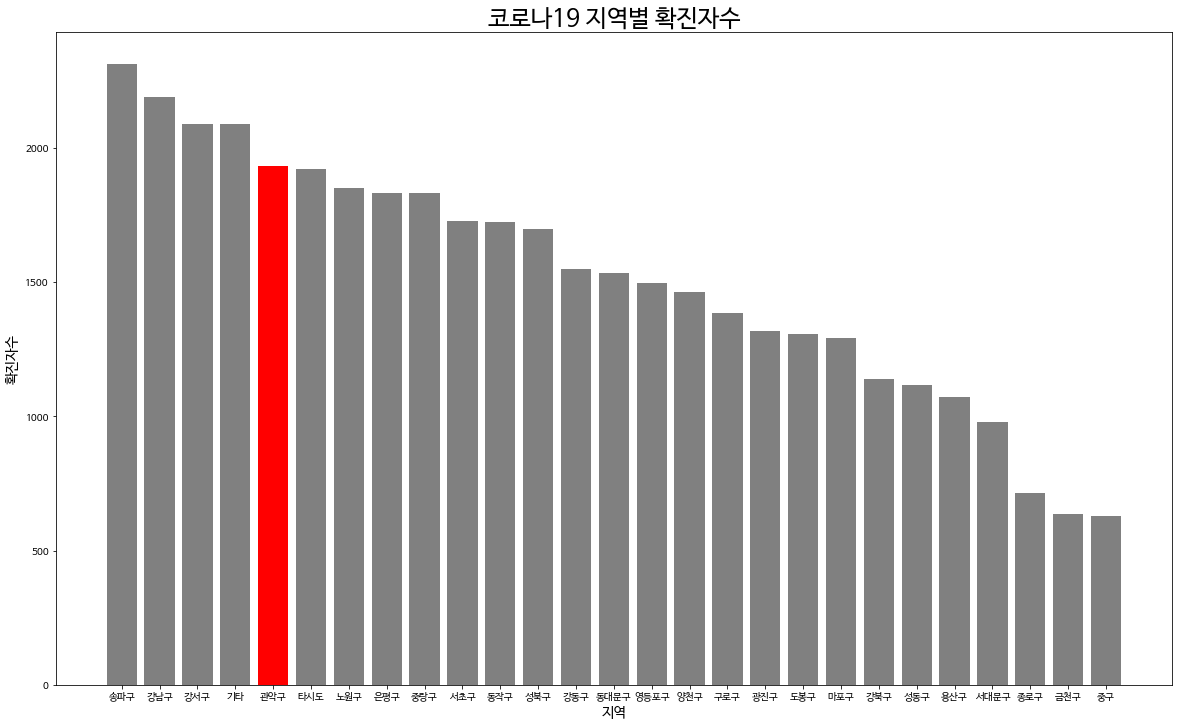

In [ ]:
fig = plt.figure(figsize=(20, 12)) #figsize로 그래프의 크기 변경 가능

colors = pd.Series("gray", index=covid_per_area.index)
colors["관악구"] = "red"

plt.bar(covid_per_area.index, covid_per_area, color=colors)

plt.title("코로나19 지역별 확진자수", fontsize=24)
plt.xlabel("지역", fontsize=14)
plt.ylabel("확진자수", fontsize=14)

plt.show()

**문제2) 아래의 질문에 답하여라.**

1) `environment1.csv`와 `environment2.csv` 파일을 읽어 데이터프레임 `df1`과 `df2`를 만들어라. 

In [ ]:
df1 = pd.read_csv("environment1.csv")
df1

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
0,2021-03-02,11:07,경기,안산시 상록구,성호로,경기도 안산시상록구 일동 634도,경기도 안산시상록구 부곡동 598도,5.0,63.0,324,매우나쁨
1,2021-03-02,11:27,경기,안산시 상록구,충장로,경기도 안산시상록구 부곡동 739-21도,경기도 안산시상록구 본오동 1158도,4.0,61.0,230,매우나쁨
2,2021-03-02,11:54,경기,안산시 상록구,해안로,경기도 안산시상록구 팔곡일동 557-3도,경기도 안산시상록구 사동 1634 천,5.0,59.0,80,좋음
3,2021-03-02,12:09,경기,안산시 단원구,해안로,경기도 안산시단원구 초지동 795 천,경기도 안산시단원구 성곡동 619-1도,NaN,56.0,88,좋음
4,2021-03-02,12:22,경기,안산시 단원구,첨단로,경기도 안산시단원구 초지동 660-10도,경기도 안산시단원구 성곡동 780천,5.0,54.0,178,나쁨
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-03-12,12:14,경기,김포시,김포한강11로,경기도 김포시 운양동 1400-3도,경기도 김포시 운양동 1400 도,14.0,52.0,86,좋음
496,2021-03-12,12:51,경기,김포시,돌문로,경기도 김포시 사우동 186-20도,경기도 김포시 사우동 838-45도,15.0,48.0,456,매우나쁨
497,2021-03-12,14:10,경기,김포시,마송1로,경기도 김포시 통진읍 마송리 592 도,경기도 김포시 통진읍 마송리 592 도,15.0,57.0,27,매우좋음
498,2021-03-12,14:17,경기,김포시,마송로,경기도 김포시 통진읍 마송리 159-37 임,경기도 김포시 통진읍 마송리 592-9도,14.0,57.0,453,매우나쁨


In [ ]:
df2 = pd.read_csv("environment2.csv")
df2

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
0,2021-03-12,15:04,경기,김포시,양곡2로,경기도 김포시 양촌읍 양곡리 248-3 답,경기도 김포시 구래동 5419전,14.0,63.0,24,매우좋음
1,2021-03-12,9:54,경기,안산시 단원구,선부로,경기도 안산시단원구 선부동 1158-7도,경기도 안산시단원구 와동 268-1도,11.0,66.0,161,나쁨
2,2021-03-12,10:18,경기,안산시 단원구,지곡로,경기도 안산시단원구 선부동 1158-12도,경기도 안산시단원구 원곡동 993-1도,11.0,63.0,401,매우나쁨
3,2021-03-12,12:00,경기,광명시,금오로,경기도 광명시 옥길동 45-2도,경기도 광명시 옥길동 340-1도,14.0,47.0,833,매우나쁨
4,2021-03-12,12:10,서울,구로구,금오로,서울특별시 구로구 천왕동 278-3 도,서울특별시 구로구 천왕동 12-2도,14.0,49.0,103,보통
...,...,...,...,...,...,...,...,...,...,...,...
819,2021-03-31,13:16,경기,용인시 기흥구,흥덕2로,경기도 용인시기흥구 영덕동 1202천,경기도 용인시기흥구 영덕동 889도,21.0,22.0,155,나쁨
820,2021-03-31,13:56,경기,용인시 기흥구,흥덕1로,경기도 용인시기흥구 영덕동 1152도,경기도 용인시기흥구 영덕동 1144도,24.0,16.0,114,보통
821,2021-03-31,14:02,경기,용인시 기흥구,중부대로,경기도 용인시기흥구 영덕동 889도,경기도 용인시기흥구 상하동 산 46-107도,22.0,18.0,187,나쁨
822,2021-03-31,14:36,경기,용인시 기흥구,한보라1로,경기도 용인시기흥구 보라동 636-1 도,경기도 용인시기흥구 공세동 690도,23.0,17.0,57,좋음


2) `df1`과 `df2`의 처음 10개와 끝 10개의 행을 확인하여라.

`head()`와 `tail()` 메소드를 이용하며, 10개의 행을 표시하기 위하여 인자로 숫자 `10`을 준다. 

In [ ]:
df1.head(10)

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
0,2021-03-02,11:07,경기,안산시 상록구,성호로,경기도 안산시상록구 일동 634도,경기도 안산시상록구 부곡동 598도,5.0,63.0,324,매우나쁨
1,2021-03-02,11:27,경기,안산시 상록구,충장로,경기도 안산시상록구 부곡동 739-21도,경기도 안산시상록구 본오동 1158도,4.0,61.0,230,매우나쁨
2,2021-03-02,11:54,경기,안산시 상록구,해안로,경기도 안산시상록구 팔곡일동 557-3도,경기도 안산시상록구 사동 1634 천,5.0,59.0,80,좋음
3,2021-03-02,12:09,경기,안산시 단원구,해안로,경기도 안산시단원구 초지동 795 천,경기도 안산시단원구 성곡동 619-1도,NaN,56.0,88,좋음
4,2021-03-02,12:22,경기,안산시 단원구,첨단로,경기도 안산시단원구 초지동 660-10도,경기도 안산시단원구 성곡동 780천,5.0,54.0,178,나쁨
5,2021-03-02,12:38,경기,안산시 단원구,시화로,경기도 안산시단원구 성곡동 695천,경기도 안산시단원구 성곡동 773도,6.0,52.0,82,좋음
6,2021-03-02,12:53,경기,안산시 단원구,별망로,경기도 안산시단원구 성곡동 721도,경기도 안산시단원구 초지동 634도,NaN,51.0,57,좋음
7,2021-03-02,13:21,경기,안산시 단원구,광덕4로,경기도 안산시단원구 초지동 793 도,경기도 안산시단원구 고잔동 831천,6.0,51.0,240,매우나쁨
8,2021-03-02,13:30,경기,안산시 상록구,광덕4로,경기도 안산시상록구 이동 759천,경기도 안산시상록구 사동 1212-5도,6.0,51.0,114,보통
9,2021-03-02,14:36,경기,안산시 단원구,중앙대로,경기도 안산시단원구 고잔동 554-2도,경기도 안산시단원구 성곡동 693도,7.0,46.0,85,좋음


In [ ]:
df1.tail(10)

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
490,2021-03-12,12:25,서울,은평구,진관1로,서울특별시 은평구 진관동 234-30도,서울특별시 은평구 진관동 159-9답,15.0,41.0,22,매우좋음
491,2021-03-12,12:49,서울,은평구,통일로,서울특별시 은평구 진관동 75-1도,서울특별시 은평구 응암동 32-1도,15.0,39.0,19,매우좋음
492,2021-03-12,13:11,서울,은평구,은평로,서울특별시 은평구 녹번동 55도,서울특별시 은평구 신사동 41-3도,15.0,39.0,24,매우좋음
493,2021-03-12,9:55,인천,강화군,길상로,인천광역시 강화군 길상면 온수리 550-4도,인천광역시 강화군 길상면 초지리 1934-2 답,12.0,58.0,846,매우나쁨
494,2021-03-12,10:52,경기,고양시 일산서구,고양대로,경기도 고양시일산서구 법곳동 740천,경기도 고양시일산서구 일산동 1653도,13.0,53.0,25,매우좋음
495,2021-03-12,12:14,경기,김포시,김포한강11로,경기도 김포시 운양동 1400-3도,경기도 김포시 운양동 1400 도,14.0,52.0,86,좋음
496,2021-03-12,12:51,경기,김포시,돌문로,경기도 김포시 사우동 186-20도,경기도 김포시 사우동 838-45도,15.0,48.0,456,매우나쁨
497,2021-03-12,14:10,경기,김포시,마송1로,경기도 김포시 통진읍 마송리 592 도,경기도 김포시 통진읍 마송리 592 도,15.0,57.0,27,매우좋음
498,2021-03-12,14:17,경기,김포시,마송로,경기도 김포시 통진읍 마송리 159-37 임,경기도 김포시 통진읍 마송리 592-9도,14.0,57.0,453,매우나쁨
499,2021-03-12,14:54,경기,김포시,양곡4로,경기도 김포시 구래동 5403도,경기도 김포시 양촌읍 양곡리 1503 도,14.0,62.0,47,매우좋음


In [ ]:
df2.head(10)

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
0,2021-03-12,15:04,경기,김포시,양곡2로,경기도 김포시 양촌읍 양곡리 248-3 답,경기도 김포시 구래동 5419전,14.0,63.0,24,매우좋음
1,2021-03-12,9:54,경기,안산시 단원구,선부로,경기도 안산시단원구 선부동 1158-7도,경기도 안산시단원구 와동 268-1도,11.0,66.0,161,나쁨
2,2021-03-12,10:18,경기,안산시 단원구,지곡로,경기도 안산시단원구 선부동 1158-12도,경기도 안산시단원구 원곡동 993-1도,11.0,63.0,401,매우나쁨
3,2021-03-12,12:00,경기,광명시,금오로,경기도 광명시 옥길동 45-2도,경기도 광명시 옥길동 340-1도,14.0,47.0,833,매우나쁨
4,2021-03-12,12:10,서울,구로구,금오로,서울특별시 구로구 천왕동 278-3 도,서울특별시 구로구 천왕동 12-2도,14.0,49.0,103,보통
5,2021-03-12,12:40,서울,구로구,신도림로,서울특별시 구로구 신도림동 290-10 도,서울특별시 구로구 신도림동 312-16도,15.0,46.0,64,좋음
6,2021-03-12,13:16,서울,영등포구,가마산로,서울특별시 영등포구 대림동 774도,서울특별시 영등포구 신길동 4880도,15.0,44.0,48,매우좋음
7,2021-03-12,15:13,인천,서구,로봇랜드로,인천광역시 서구 경서동 514도,인천광역시 서구 원창동 437-27 잡,14.0,60.0,182,나쁨
8,2021-03-12,15:29,인천,서구,비지니스로,인천광역시 서구 경서동 920-10도,인천광역시 서구 경서동 979-5도,13.0,64.0,27,매우좋음
9,2021-03-12,15:37,인천,서구,청라한내로,인천광역시 서구 경서동 973-7도,인천광역시 서구 경서동 834-138도,13.0,67.0,28,매우좋음


In [ ]:
df2.tail(10)

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
814,2021-03-31,12:07,경기,용인시 기흥구,기흥로,경기도 용인시기흥구 구갈동 373-6전,경기도 용인시기흥구 신갈동 679도,20.0,23.0,628,매우나쁨
815,2021-03-31,12:14,경기,용인시 기흥구,관곡로,경기도 용인시기흥구 신갈동 614도,경기도 용인시기흥구 구갈동 290-1도,20.0,23.0,55,좋음
816,2021-03-31,12:31,경기,용인시 기흥구,신갈로,경기도 용인시기흥구 신갈동 388-434도,경기도 용인시기흥구 상갈동 126도,20.0,22.0,362,매우나쁨
817,2021-03-31,12:39,경기,용인시 기흥구,금화로,경기도 용인시기흥구 상갈동 96-2도,경기도 용인시기흥구 상갈동 34-5답,21.0,22.0,31,매우좋음
818,2021-03-31,13:06,경기,용인시 기흥구,흥덕중앙로,경기도 용인시기흥구 영덕동 1186도,경기도 용인시기흥구 영덕동 1256천,21.0,22.0,47,매우좋음
819,2021-03-31,13:16,경기,용인시 기흥구,흥덕2로,경기도 용인시기흥구 영덕동 1202천,경기도 용인시기흥구 영덕동 889도,21.0,22.0,155,나쁨
820,2021-03-31,13:56,경기,용인시 기흥구,흥덕1로,경기도 용인시기흥구 영덕동 1152도,경기도 용인시기흥구 영덕동 1144도,24.0,16.0,114,보통
821,2021-03-31,14:02,경기,용인시 기흥구,중부대로,경기도 용인시기흥구 영덕동 889도,경기도 용인시기흥구 상하동 산 46-107도,22.0,18.0,187,나쁨
822,2021-03-31,14:36,경기,용인시 기흥구,한보라1로,경기도 용인시기흥구 보라동 636-1 도,경기도 용인시기흥구 공세동 690도,23.0,17.0,57,좋음
823,2021-03-31,14:49,경기,용인시 기흥구,탑실로,경기도 용인시기흥구 공세동 731 도,경기도 용인시기흥구 공세동 307-27답,22.0,17.0,73,좋음


3) `df1`과 `df2`에는 각각 몇 개의 관측치가 있는가?

아래와 같이 `df1`에는 500개, `df2`에는 824개의 관측치가 존재한다. 

In [ ]:
len(df1)

500

In [ ]:
len(df2)

824

4) `df1`과 `df2`를 합하여 데이터프레임 `df`를 만들어라.

데이터프레임을 합치기 위하여 판다스 `concat()` 함수를 이용하면 된다. 이 때, 인덱스 재배열을 위해 `ignore_index=True`를 인자로 주었다. 

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
df

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
0,2021-03-02,11:07,경기,안산시 상록구,성호로,경기도 안산시상록구 일동 634도,경기도 안산시상록구 부곡동 598도,5.0,63.0,324,매우나쁨
1,2021-03-02,11:27,경기,안산시 상록구,충장로,경기도 안산시상록구 부곡동 739-21도,경기도 안산시상록구 본오동 1158도,4.0,61.0,230,매우나쁨
2,2021-03-02,11:54,경기,안산시 상록구,해안로,경기도 안산시상록구 팔곡일동 557-3도,경기도 안산시상록구 사동 1634 천,5.0,59.0,80,좋음
3,2021-03-02,12:09,경기,안산시 단원구,해안로,경기도 안산시단원구 초지동 795 천,경기도 안산시단원구 성곡동 619-1도,NaN,56.0,88,좋음
4,2021-03-02,12:22,경기,안산시 단원구,첨단로,경기도 안산시단원구 초지동 660-10도,경기도 안산시단원구 성곡동 780천,5.0,54.0,178,나쁨
...,...,...,...,...,...,...,...,...,...,...,...
1319,2021-03-31,13:16,경기,용인시 기흥구,흥덕2로,경기도 용인시기흥구 영덕동 1202천,경기도 용인시기흥구 영덕동 889도,21.0,22.0,155,나쁨
1320,2021-03-31,13:56,경기,용인시 기흥구,흥덕1로,경기도 용인시기흥구 영덕동 1152도,경기도 용인시기흥구 영덕동 1144도,24.0,16.0,114,보통
1321,2021-03-31,14:02,경기,용인시 기흥구,중부대로,경기도 용인시기흥구 영덕동 889도,경기도 용인시기흥구 상하동 산 46-107도,22.0,18.0,187,나쁨
1322,2021-03-31,14:36,경기,용인시 기흥구,한보라1로,경기도 용인시기흥구 보라동 636-1 도,경기도 용인시기흥구 공세동 690도,23.0,17.0,57,좋음


5) `df`의 각 열에는 몇 개의 결측치가 있는가?

데이터프레임의 결측치의 개수를 세기 위하여 `isnull()` 메소드와 `sum()` 메소드를 이용한다. 

In [ ]:
df.isnull().sum()

측정일자                0
측정시간                0
지역                  0
지역명                 0
도로명                 0
시작점                 0
종점                  0
기온 (℃)             11
습도 (%)              4
재비산먼지 평균농도(㎍/㎥)     0
오염범례                0
dtype: int64

6) `df`의 각 열의 결측치를 각 열의 평균으로 대체하여라. 

결측치가 제대로 대체되었는지 확인하기 위하여 값 대입 전의 데이터프레임을 `df_old` 변수에 저장하였다. 

In [ ]:
df_old = df

In [ ]:
df_old

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
0,2021-03-02,11:07,경기,안산시 상록구,성호로,경기도 안산시상록구 일동 634도,경기도 안산시상록구 부곡동 598도,5.0,63.0,324,매우나쁨
1,2021-03-02,11:27,경기,안산시 상록구,충장로,경기도 안산시상록구 부곡동 739-21도,경기도 안산시상록구 본오동 1158도,4.0,61.0,230,매우나쁨
2,2021-03-02,11:54,경기,안산시 상록구,해안로,경기도 안산시상록구 팔곡일동 557-3도,경기도 안산시상록구 사동 1634 천,5.0,59.0,80,좋음
3,2021-03-02,12:09,경기,안산시 단원구,해안로,경기도 안산시단원구 초지동 795 천,경기도 안산시단원구 성곡동 619-1도,NaN,56.0,88,좋음
4,2021-03-02,12:22,경기,안산시 단원구,첨단로,경기도 안산시단원구 초지동 660-10도,경기도 안산시단원구 성곡동 780천,5.0,54.0,178,나쁨
...,...,...,...,...,...,...,...,...,...,...,...
1319,2021-03-31,13:16,경기,용인시 기흥구,흥덕2로,경기도 용인시기흥구 영덕동 1202천,경기도 용인시기흥구 영덕동 889도,21.0,22.0,155,나쁨
1320,2021-03-31,13:56,경기,용인시 기흥구,흥덕1로,경기도 용인시기흥구 영덕동 1152도,경기도 용인시기흥구 영덕동 1144도,24.0,16.0,114,보통
1321,2021-03-31,14:02,경기,용인시 기흥구,중부대로,경기도 용인시기흥구 영덕동 889도,경기도 용인시기흥구 상하동 산 46-107도,22.0,18.0,187,나쁨
1322,2021-03-31,14:36,경기,용인시 기흥구,한보라1로,경기도 용인시기흥구 보라동 636-1 도,경기도 용인시기흥구 공세동 690도,23.0,17.0,57,좋음


`fillna()` 메소드를 이용하여 결측치의 대체값을 넣어줄 수 있다. 이 때, 각 열 별로 대체값을 다르게 하기 위하여 `value` 인자를 사용하며 그 값으로는 `mean()` 메소드를 사용하여 각 열의 평균을 구하여 넣어주면 된다. 

In [ ]:
df = df.fillna(value=df.mean())
df

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
0,2021-03-02,11:07,경기,안산시 상록구,성호로,경기도 안산시상록구 일동 634도,경기도 안산시상록구 부곡동 598도,5.000000,63.0,324,매우나쁨
1,2021-03-02,11:27,경기,안산시 상록구,충장로,경기도 안산시상록구 부곡동 739-21도,경기도 안산시상록구 본오동 1158도,4.000000,61.0,230,매우나쁨
2,2021-03-02,11:54,경기,안산시 상록구,해안로,경기도 안산시상록구 팔곡일동 557-3도,경기도 안산시상록구 사동 1634 천,5.000000,59.0,80,좋음
3,2021-03-02,12:09,경기,안산시 단원구,해안로,경기도 안산시단원구 초지동 795 천,경기도 안산시단원구 성곡동 619-1도,13.488195,56.0,88,좋음
4,2021-03-02,12:22,경기,안산시 단원구,첨단로,경기도 안산시단원구 초지동 660-10도,경기도 안산시단원구 성곡동 780천,5.000000,54.0,178,나쁨
...,...,...,...,...,...,...,...,...,...,...,...
1319,2021-03-31,13:16,경기,용인시 기흥구,흥덕2로,경기도 용인시기흥구 영덕동 1202천,경기도 용인시기흥구 영덕동 889도,21.000000,22.0,155,나쁨
1320,2021-03-31,13:56,경기,용인시 기흥구,흥덕1로,경기도 용인시기흥구 영덕동 1152도,경기도 용인시기흥구 영덕동 1144도,24.000000,16.0,114,보통
1321,2021-03-31,14:02,경기,용인시 기흥구,중부대로,경기도 용인시기흥구 영덕동 889도,경기도 용인시기흥구 상하동 산 46-107도,22.000000,18.0,187,나쁨
1322,2021-03-31,14:36,경기,용인시 기흥구,한보라1로,경기도 용인시기흥구 보라동 636-1 도,경기도 용인시기흥구 공세동 690도,23.000000,17.0,57,좋음


아래와 같이 결측치가 존재하는 기온과 습도 열에서 결측치가 존재했던 행을 조회해보면 정상적으로 대체값이 대입되었음을 알 수 있다. 

In [ ]:
df[df_old["습도 (%)"].isnull()]

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
385,2021-03-10,12:23,경기,양주시,회정로,경기도 양주시 회정동 203-1천,경기도 양주시 고암동 119도,13.0,45.487121,317,매우나쁨
408,2021-03-10,13:25,경기,수원시 팔달구,수성로,경기도 수원시 팔달구 화서동 360-1도,경기도 수원시 팔달구 화서동 360-1도,15.0,45.487121,173,나쁨
559,2021-03-15,11:52,경기,고양시 일산서구,월드고양로,경기도 고양시일산동구 장항동 1592 전,경기도 고양시일산서구 대화동 2732 도,14.0,45.487121,176,나쁨
618,2021-03-16,14:47,경기,의정부시,시민로,경기도 의정부시 의정부동 617도,경기도 의정부시 용현동 65-7도,14.0,45.487121,142,보통


In [ ]:
df[df_old["기온 (℃)"].isnull()]

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
3,2021-03-02,12:09,경기,안산시 단원구,해안로,경기도 안산시단원구 초지동 795 천,경기도 안산시단원구 성곡동 619-1도,13.488195,56.0,88,좋음
6,2021-03-02,12:53,경기,안산시 단원구,별망로,경기도 안산시단원구 성곡동 721도,경기도 안산시단원구 초지동 634도,13.488195,51.0,57,좋음
10,2021-03-02,15:15,경기,안산시 단원구,삼일로,경기도 안산시단원구 신길동 1375 도,경기도 안산시단원구 고잔동 570-2천,13.488195,46.0,116,보통
24,2021-03-02,13:37,경기,수원시 팔달구,중부대로,경기도 수원시 팔달구 중동 153도,경기도 수원시 팔달구 우만동 447도,13.488195,62.0,17,매우좋음
39,2021-03-02,13:43,경기,고양시 덕양구,백양로,경기도 고양시덕양구 화정동 1068도,경기도 고양시덕양구 화정동 1152도,13.488195,59.0,831,매우나쁨
64,2021-03-03,14:55,경기,안산시 단원구,선부로,경기도 안산시단원구 선부동 1158-7도,경기도 안산시단원구 와동 268-1도,13.488195,44.0,181,나쁨
116,2021-03-03,14:17,인천,서구,북항로207번길,인천광역시 서구 원창동 485-1 도,인천광역시 서구 원창동 485-3 도,13.488195,69.0,253,매우나쁨
132,2021-03-04,13:01,경기,안산시 단원구,와동공원로,경기도 안산시단원구 와동 863도,경기도 안산시단원구 선부동 1158-12도,13.488195,49.0,250,매우나쁨
146,2021-03-04,12:50,경기,수원시 권선구,매실로,경기도 수원시 권선구 호매실동 36-11 답,경기도 수원시 권선구 호매실동 471-3임,13.488195,55.0,90,좋음
274,2021-03-08,12:44,경기,수원시 영통구,센트럴파크로,경기도 수원시 영통구 이의동 1379-5도,경기도 수원시 영통구 하동 1044-2도,13.488195,57.0,22,매우좋음


아래와 같이 코드를 작성할 수도 있다. 

In [ ]:
df = df.fillna(df.mean())
df

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
0,2021-03-02,11:07,경기,안산시 상록구,성호로,경기도 안산시상록구 일동 634도,경기도 안산시상록구 부곡동 598도,5.000000,63.0,324,매우나쁨
1,2021-03-02,11:27,경기,안산시 상록구,충장로,경기도 안산시상록구 부곡동 739-21도,경기도 안산시상록구 본오동 1158도,4.000000,61.0,230,매우나쁨
2,2021-03-02,11:54,경기,안산시 상록구,해안로,경기도 안산시상록구 팔곡일동 557-3도,경기도 안산시상록구 사동 1634 천,5.000000,59.0,80,좋음
3,2021-03-02,12:09,경기,안산시 단원구,해안로,경기도 안산시단원구 초지동 795 천,경기도 안산시단원구 성곡동 619-1도,13.488195,56.0,88,좋음
4,2021-03-02,12:22,경기,안산시 단원구,첨단로,경기도 안산시단원구 초지동 660-10도,경기도 안산시단원구 성곡동 780천,5.000000,54.0,178,나쁨
...,...,...,...,...,...,...,...,...,...,...,...
1319,2021-03-31,13:16,경기,용인시 기흥구,흥덕2로,경기도 용인시기흥구 영덕동 1202천,경기도 용인시기흥구 영덕동 889도,21.000000,22.0,155,나쁨
1320,2021-03-31,13:56,경기,용인시 기흥구,흥덕1로,경기도 용인시기흥구 영덕동 1152도,경기도 용인시기흥구 영덕동 1144도,24.000000,16.0,114,보통
1321,2021-03-31,14:02,경기,용인시 기흥구,중부대로,경기도 용인시기흥구 영덕동 889도,경기도 용인시기흥구 상하동 산 46-107도,22.000000,18.0,187,나쁨
1322,2021-03-31,14:36,경기,용인시 기흥구,한보라1로,경기도 용인시기흥구 보라동 636-1 도,경기도 용인시기흥구 공세동 690도,23.000000,17.0,57,좋음


딕셔너리로 만들어 볼 수도 있다.

In [ ]:
values = {'기온 (℃)' : df['기온 (℃)'].mean(), '습도 (%)' : df['습도 (%)'].mean()}
values

{'기온 (℃)': 13.488194973343488, '습도 (%)': 45.48712121212121}

In [ ]:
df = df.fillna(value = values)
df

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온 (℃),습도 (%),재비산먼지 평균농도(㎍/㎥),오염범례
0,2021-03-02,11:07,경기,안산시 상록구,성호로,경기도 안산시상록구 일동 634도,경기도 안산시상록구 부곡동 598도,5.000000,63.0,324,매우나쁨
1,2021-03-02,11:27,경기,안산시 상록구,충장로,경기도 안산시상록구 부곡동 739-21도,경기도 안산시상록구 본오동 1158도,4.000000,61.0,230,매우나쁨
2,2021-03-02,11:54,경기,안산시 상록구,해안로,경기도 안산시상록구 팔곡일동 557-3도,경기도 안산시상록구 사동 1634 천,5.000000,59.0,80,좋음
3,2021-03-02,12:09,경기,안산시 단원구,해안로,경기도 안산시단원구 초지동 795 천,경기도 안산시단원구 성곡동 619-1도,13.488195,56.0,88,좋음
4,2021-03-02,12:22,경기,안산시 단원구,첨단로,경기도 안산시단원구 초지동 660-10도,경기도 안산시단원구 성곡동 780천,5.000000,54.0,178,나쁨
...,...,...,...,...,...,...,...,...,...,...,...
1319,2021-03-31,13:16,경기,용인시 기흥구,흥덕2로,경기도 용인시기흥구 영덕동 1202천,경기도 용인시기흥구 영덕동 889도,21.000000,22.0,155,나쁨
1320,2021-03-31,13:56,경기,용인시 기흥구,흥덕1로,경기도 용인시기흥구 영덕동 1152도,경기도 용인시기흥구 영덕동 1144도,24.000000,16.0,114,보통
1321,2021-03-31,14:02,경기,용인시 기흥구,중부대로,경기도 용인시기흥구 영덕동 889도,경기도 용인시기흥구 상하동 산 46-107도,22.000000,18.0,187,나쁨
1322,2021-03-31,14:36,경기,용인시 기흥구,한보라1로,경기도 용인시기흥구 보라동 636-1 도,경기도 용인시기흥구 공세동 690도,23.000000,17.0,57,좋음


7) `df`에 있는 서울시 데이터로 기온과 습도의 산점도를 그려라. 이때, 각 점의 크기는 재비산먼지에 따라 다르게 한다. 

산점도는 `plt.scatter()` 함수로 그릴 수 있다. 여기서 점의 크기가 너무 커져서 `20`으로 나누어주었다. 

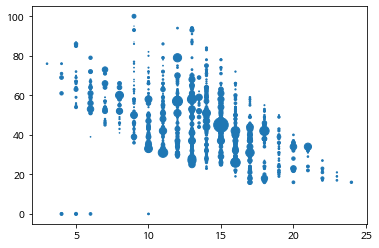

In [ ]:
col_x = "기온 (℃)"
col_y = "습도 (%)"
col_size = "재비산먼지 평균농도(㎍/㎥)"

plt.scatter(df[col_x], df[col_y], s=df[col_size] / 20)
plt.show()

이 그래프 또한 정보를 더 표시할 수 있다. 

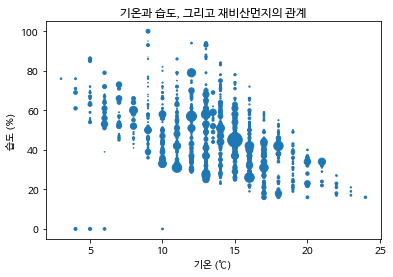

In [ ]:
col_x = "기온 (℃)"
col_y = "습도 (%)"
col_size = "재비산먼지 평균농도(㎍/㎥)"

plt.scatter(df[col_x], df[col_y], s=df[col_size] / 20)
plt.title("기온과 습도, 그리고 재비산먼지의 관계")
plt.xlabel(col_x)
plt.ylabel(col_y)

plt.show()

연습을 더 하고 싶다면, 아래의 문제를 풀어보세요!  

**[추가문제1] 아래의 질문에 답하여라.**

1) 원 그래프를 그려라.     
* 문제1)에서 만든 데이터프레임 `df_covid`을 이용한다.
* 관악구와 관악구가 아닌 지역으로만 구분한다.
* 관악구 조각은 돌출되게 만들고, 다른 색으로 표시하여 잘 보이도록 한다. 


`df_covid`의 정보를 이용하여 지역별 확진자수를 원 그래프로 그려보도록 한다.  
  
관악구 지역만 다른 색깔과 돌출된 특징을 부여하기 위하여 두개의 시리즈를 만들고, 관악구 지역만 특별히 다른 값을 부여하여 사용한다. 색깔은 `colors` 인자에, 돌출값은 `explode` 인자를 통해 전달되었다. 

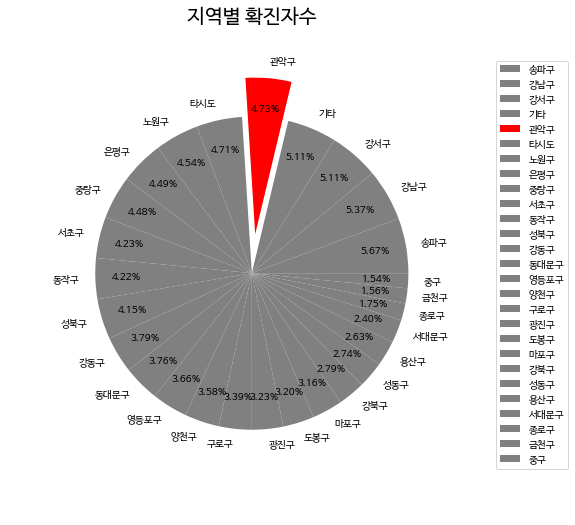

In [ ]:
covid_per_area = df_covid["지역"].value_counts()

fig = plt.figure(figsize=(16, 9))

# 색깔
colors = pd.Series("gray", index=covid_per_area.index)
colors["관악구"] = "red"

# 돌출
explode = pd.Series(0.0, index=covid_per_area.index)
explode["관악구"] = 0.2

plt.pie(covid_per_area, labels=covid_per_area.index, 
        autopct = '%.2f%%', pctdistance=0.8, 
        colors=colors, explode=explode, radius=0.8)

plt.title("지역별 확진자수", fontsize=20)
plt.legend(covid_per_area.index, loc=(1, 0.1))

plt.show()

**[추가문제2] 아래의 질문에 답하여라.**

`seaborn` 모듈은 파이썬 데이터 시각화 모듈로, 그래프를 그리는 연습을 할 수 있도록 여러 데이터셋도 제공한다. `iris`에는 붓꽃 유형과 꽃잎과 꽃받침의 길이와 너비 정보가 담겨져 있다.   

1) 아래의 코드를 사용하여, 데이터프레임 `iris`를 만들어라.   
(여기서는 아래의 코드를 복사하여 붙여넣기 하면 된다.)

```
import seaborn as sns
iris = sns.load_dataset('iris')  #iris을 가져오는 코드
```


In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')  #iris을 가져오는 코드

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2) 붓꽃 유형은 `iris`의 `species`열에 저장되어 있다. `species`열에 있는 유일한 값과 개수를 확인하여라.  

`value_counts()` 메소드를 이용하면 유일한 값과 개수를 한번에 확인할 수 있다. 

In [ ]:
iris["species"].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

참고: `unique()` 메소드를 이용하면 유일한 값의 배열을 얻을 수 있다. 

In [ ]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

3) 꽃잎 길이(petal_length)와 꽃잎 너비(petal_width)의 산점도를 그려라.  

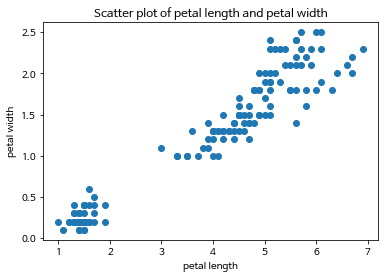

In [ ]:
plt.scatter(iris["petal_length"], iris["petal_width"])

plt.title("Scatter plot of petal length and petal width")
plt.xlabel("petal length")
plt.ylabel("petal width")

plt.show()

4) 위의 3) 산점도에서 꽃 유형(species)이 다르면, 다른 색으로 표시되도록 하여라. 이때 범례(legend)도 표시되게 한다. 

서로 다른 색깔로 표시되도록 그룹으로 나누어주는 `groupby()` 메소드를 사용한 후 for문을 통해 각 경우에 대해 처리해준다. 색깔은 `colors` 리스트에 담겨 있는 순서대로 사용되며, `color` 인자를 통해 넘겨준다. 또한, 범례에 사용될 이름은 `label` 인자를 통해 넘겨준다.  
  
참고: `(name, df_group)`과 같이 따로 괄호를 통해 묶여있는 부분은 괄호 안의 변수에 대한 값이 첫번째 인자를 풀어서 받음을 의미한다. 

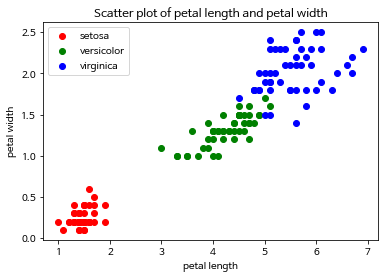

In [ ]:
colors = ["red", "green", "blue"]

for (name, df_group), color in zip(iris.groupby("species"), colors):
  plt.scatter(df_group["petal_length"], df_group["petal_width"], color=color, label=name)

plt.title("Scatter plot of petal length and petal width")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

plt.show()